# Libraries

In [1]:
from src import data # dataset functions
import pandas as pd # dataframes
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

In [2]:
# plot settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Datasets

In [3]:
data_directory = '../../../../data/04_pubmed'
datasets = data.dict_from_directory(data_directory)

# Dataframe Inspection

Save one DataFrame to a variable to inspect its structure

In [4]:
# subject & data of the first dataset
subject, dataframe = next(iter(datasets.items()))
print(f'accessing the first dataset: {subject}')

accessing the first dataset: adhd


Print the first few lines

In [5]:
dataframe.head()

,include,title,abstract,doi,literature_id,openalex_id
0,False,The effectiveness of clonidine as an analgesic...,To compare the analgesic effects of preoperati...,https://doi.org/10.1007/bf03012457,10051933,https://openalex.org/W2082613933
1,False,A Controlled Trial of Sustained-Release Buprop...,Use of nicotine-replacement therapies and the ...,https://doi.org/10.1056/nejm199903043400903,10053177,https://openalex.org/W2312609348
2,False,Effects of methylphenidate on complex cognitiv...,Three experiments were conducted to explore th...,https://doi.org/10.1037/0021-843x.108.1.90,10066996,https://openalex.org/W2022904832
3,False,Spinal Clonidine Prolongs Labor Analgesia from...,We sought to determine whether spinal clonidin...,https://doi.org/10.1097/00000539-199903000-00020,10072008,https://openalex.org/W2021097359
4,False,Low-Dose Clozapine for the Treatment of Drug-I...,Drug-induced psychosis is a difficult problem ...,https://doi.org/10.1056/nejm199903113401003,10072410,https://openalex.org/W4239283954


Index, dtypes, columns, non-null values and memory usage 

In [6]:
# calculate the memory usage insted of estimating it
dataframe.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   include        851 non-null    boolean
 1   title          851 non-null    string 
 2   abstract       830 non-null    string 
 3   doi            780 non-null    string 
 4   literature_id  851 non-null    Int64  
 5   openalex_id    843 non-null    string 
dtypes: Int64(1), boolean(1), string(4)
memory usage: 2.0 MB


- Records contain the label (include), title and abstract and multiple identifiers
- The label is a boolean, the other columns are strings or numbers
- The dataframe takes 2 MB of memory

# Missing Values

- How many titles and abstracts are missing?
- How many more were missing before downloading data from PubMed?

In [7]:
data_directory_before = '../../../../data/03_openalex'
datasets_before = data.dict_from_directory(data_directory_before)

Calculate missing titles & abstracts before and after the data retrieval:

In [8]:
missing_percentages = lambda x: x.isna().mean().round(4) * 100 # calculates the missing values percentage
columns = ['title', 'abstract'] # the columns of interest

In [43]:
df = datasets['adhd'][['title', 'abstract']]
missing = df.isna().mean()
missing

title       0.000000
abstract    0.024677
dtype: float64

In [9]:
# percentage of missing vlaues for title and abstract per dataset
missing_before = {subject: missing_percentages(df[columns]).to_list() for subject, df in datasets_before.items()}
missing_after = {subject: missing_percentages(df[columns]).to_list() for subject, df in datasets.items()}

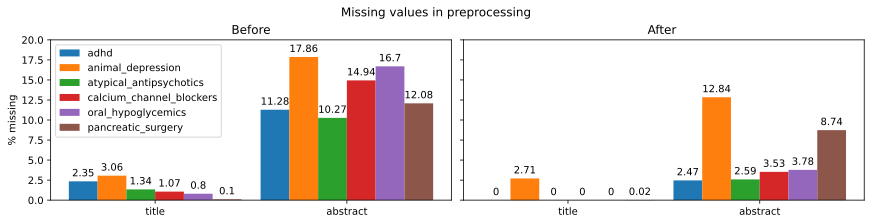

In [10]:
columns = ['title', 'abstract']

x = np.arange(len(columns))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 3),sharey=True, sharex=True, layout='constrained', num=1)

for attribute, measurement in missing_before.items():
    offset = (width * multiplier)
    rects = ax1.bar(x + offset, measurement, width, label=attribute)
    ax1.bar_label(rects, padding=3)
    multiplier += 1

multiplier = 0

for attribute, measurement in missing_after.items():
    offset = width * multiplier
    rects = ax2.bar(x + offset, measurement, width, label=attribute)
    ax2.bar_label(rects, padding=3)
    multiplier += 1

ax1.set_ylabel('% missing')
fig.suptitle('Missing values in preprocessing')
ax1.set_title('Before')
ax2.set_title('After ')
ax1.set_xticks(ticks= x + width * 2.5, labels=columns)
ax1.legend(loc='upper left')
ax1.set_ylim(0, 20)

plt.show()

# Label Distributions

In [11]:
sample = datasets['adhd'].value_counts(subset='include', normalize=True)

In [12]:
excludes = [datasets[key].value_counts(subset='include', normalize=True)[False] for key in datasets.keys()]
includes = [datasets[key].value_counts(subset='include', normalize=True)[True] for key in datasets.keys()]

In [13]:
excludes

[0.9764982373678026,
 0.8595082789764175,
 0.8696428571428572,
 0.9178981937602627,
 0.7296222664015904,
 0.9312108986727474]

In [14]:
includes

[0.023501762632197415,
 0.14049172102358254,
 0.13035714285714287,
 0.08210180623973727,
 0.27037773359840955,
 0.06878910132725252]

# Text Specific Analyses